In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.feature_selection import SelectKBest,chi2

In [2]:
df=pd.read_csv('supply_chain_data.csv')

In [3]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [5]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [6]:
df.duplicated().sum()

0

# EDA

Text(0.5, 1.0, 'Product type')

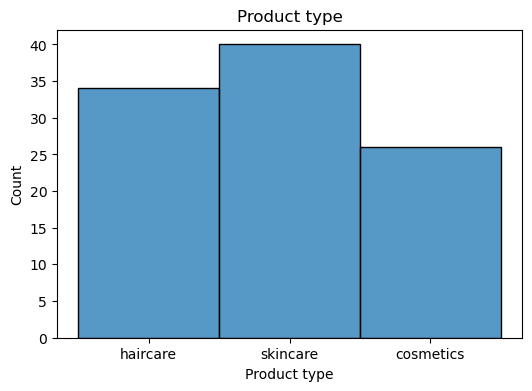

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(data=df,x='Product type')
plt.title('Product type')

<Axes: xlabel='Price', ylabel='Count'>

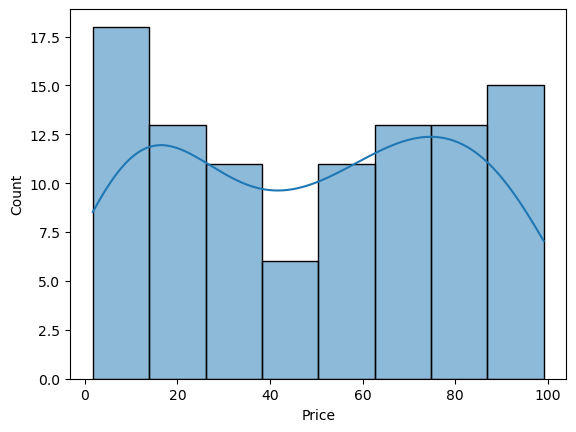

In [8]:
sns.histplot(data=df,x='Price',kde=True)

<Axes: xlabel='Price', ylabel='Number of products sold'>

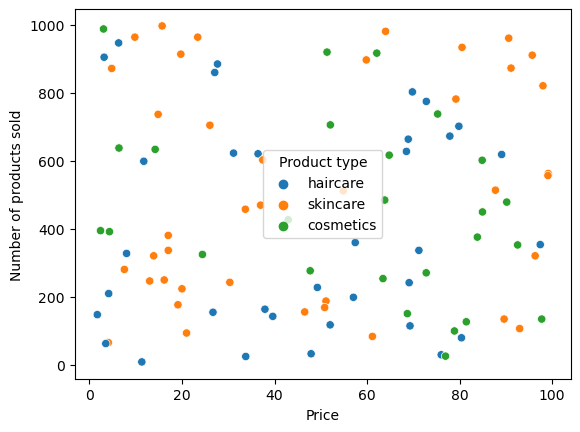

In [9]:
sns.scatterplot(data=df,x='Price',y='Number of products sold',hue='Product type')

In [10]:
df.groupby('Product type').describe()['Price']

,count,mean,std,min,25%,50%,75%,max
Product type,,,,,,,,
cosmetics,26.0,57.361058,30.423912,2.397275,44.147347,64.311917,80.821379,97.760086
haircare,34.0,46.014279,28.850845,1.699976,26.796123,48.588874,69.678712,97.446947
skincare,40.0,47.259329,33.337844,4.078333,17.033205,37.228419,82.344926,99.171329


<Axes: xlabel='Price', ylabel='Product type'>

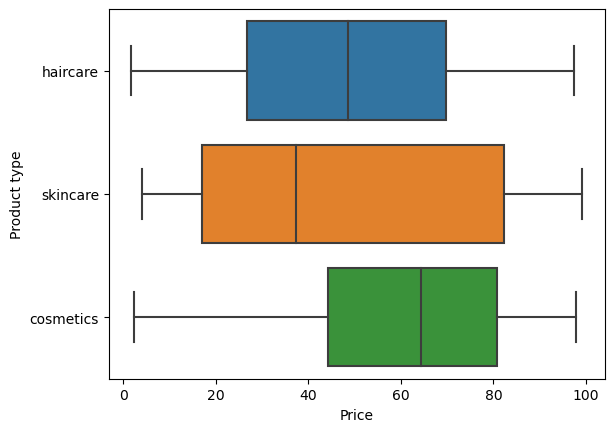

In [11]:
sns.boxplot(data=df,x='Price',y='Product type')

<Axes: xlabel='Customer demographics', ylabel='Count'>

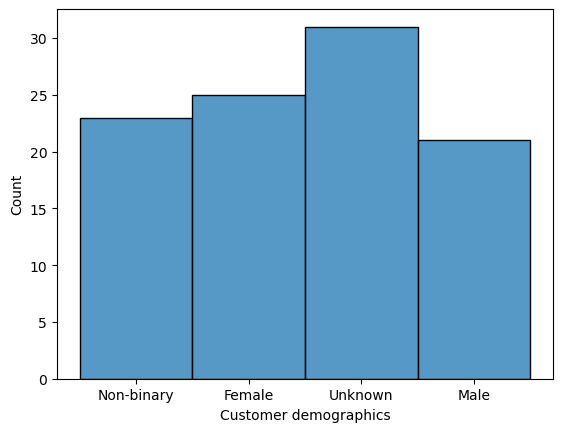

In [12]:
sns.histplot(data=df,x='Customer demographics')

<Axes: xlabel='Location', ylabel='Count'>

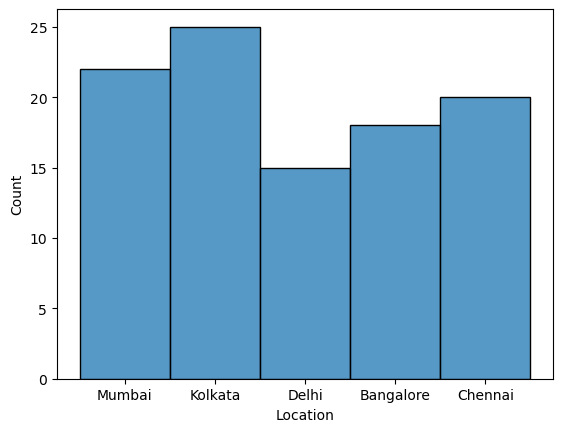

In [13]:
sns.histplot(data=df,x='Location')

Text(0.5, 1.0, 'price of Product type in Location')

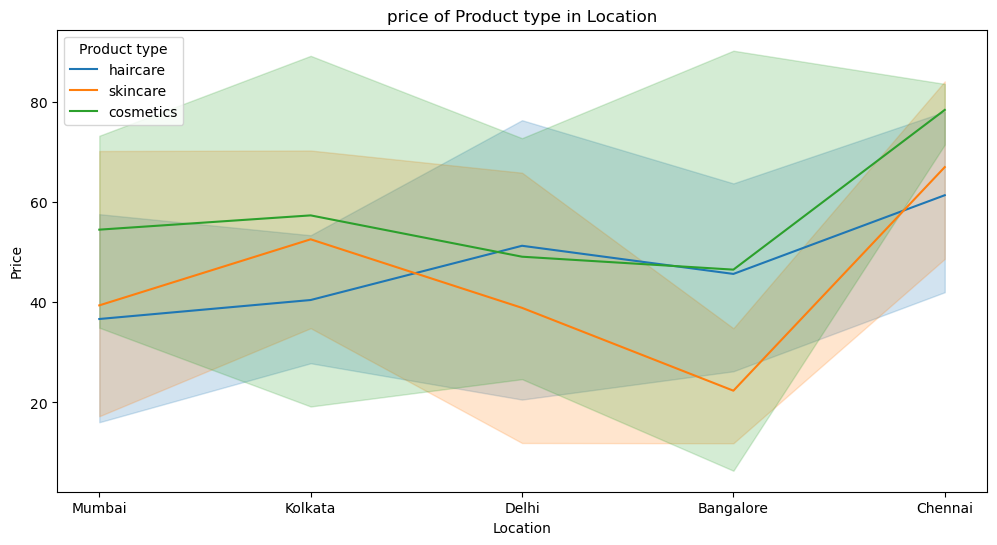

In [14]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df,y='Price',x='Location',hue='Product type')
plt.title('price of Product type in Location')

In [15]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


<Axes: xlabel='Transportation modes', ylabel='Count'>

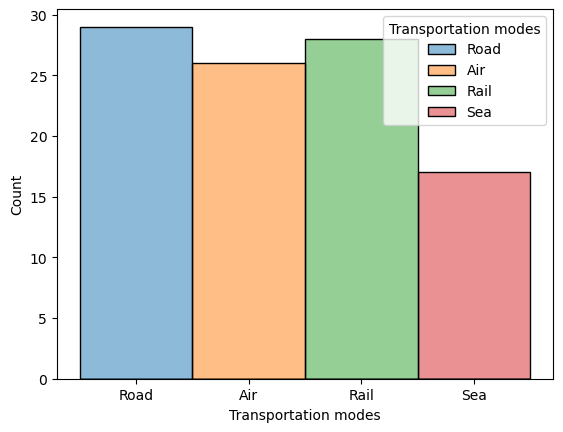

In [16]:
sns.histplot(data=df,x='Transportation modes',hue='Transportation modes')

<Axes: xlabel='Product type', ylabel='Defect rates'>

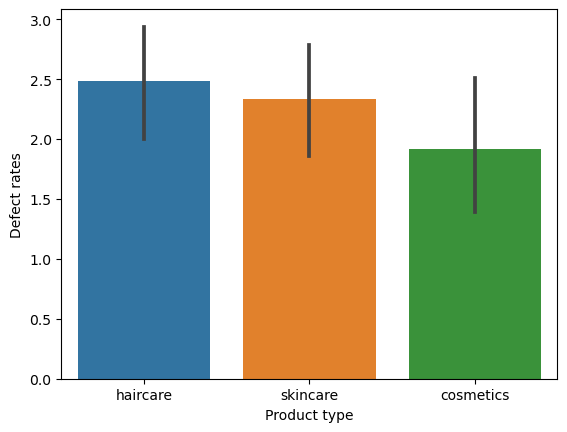

In [17]:
sns.barplot(data=df,x='Product type',y='Defect rates')

In [18]:
df.dtypes

Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers           object
Shipping costs             float64
Supplier name               object
Location                    object
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
dtype: object

In [19]:
df=df.drop('SKU',axis=1)

# Label Encoder

In [20]:
lb=LabelEncoder()

In [21]:
columns=['Product type','Customer demographics','Shipping carriers','Supplier name','Location','Inspection results',
         'Transportation modes','Routes']

for c in columns:
    df[c]=lb.fit_transform(df[c])
    

In [22]:
df.dtypes

Product type                 int32
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics        int32
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers            int32
Shipping costs             float64
Supplier name                int32
Location                     int32
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results           int32
Defect rates               float64
Transportation modes         int32
Routes                       int32
Costs                      float64
dtype: object

<Axes: >

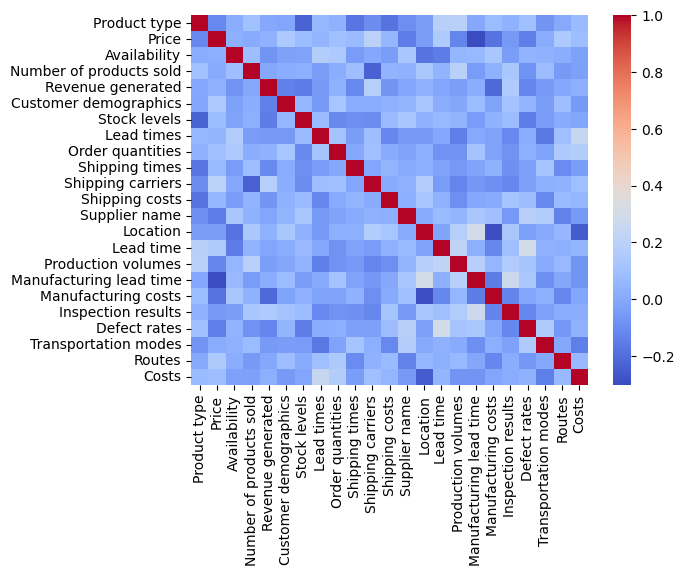

In [23]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [24]:
x=df.drop('Price',axis=1).values
y=df['Price'].values

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

# Scaler

In [26]:
scaler=MinMaxScaler()
x_train_norm=scaler.fit_transform(x_train)
x_test_norm=scaler.transform(x_test)

In [27]:
x_train.shape,x_test.shape

((80, 22), (20, 22))

# model development

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [29]:
model=Sequential()

In [30]:
model.add(Dense(22,activation='relu'))
model.add(Dense(22,activation='relu'))
model.add(Dense(22,activation='relu'))
model.add(Dense(1))

In [31]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [32]:
normModel=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
1/1 [==============================] - 2s 2s/step - loss: 3398535.5000 - mae: 1669.8070 - val_loss: 3289391.2500 - val_mae: 1713.5935
Epoch 2/400
1/1 [==============================] - 0s 42ms/step - loss: 2900486.7500 - mae: 1543.6182 - val_loss: 2771152.7500 - val_mae: 1573.7666
Epoch 3/400
1/1 [==============================] - 0s 56ms/step - loss: 2443903.5000 - mae: 1417.9215 - val_loss: 2300669.5000 - val_mae: 1435.0159
Epoch 4/400
1/1 [==============================] - 0s 33ms/step - loss: 2028970.0000 - mae: 1292.9885 - val_loss: 1876087.2500 - val_mae: 1297.0206
Epoch 5/400
1/1 [==============================] - 0s 31ms/step - loss: 1655728.8750 - mae: 1169.1077 - val_loss: 1497620.5000 - val_mae: 1159.8044
Epoch 6/400
1/1 [==============================] - 0s 47ms/step - loss: 1322930.7500 - mae: 1046.1824 - val_loss: 1168135.6250 - val_mae: 1025.2136
Epoch 7/400
1/1 [==============================] - 0s 47ms/step - loss: 1032285.1250 - mae: 925.2227 - val_loss: 8

<Axes: >

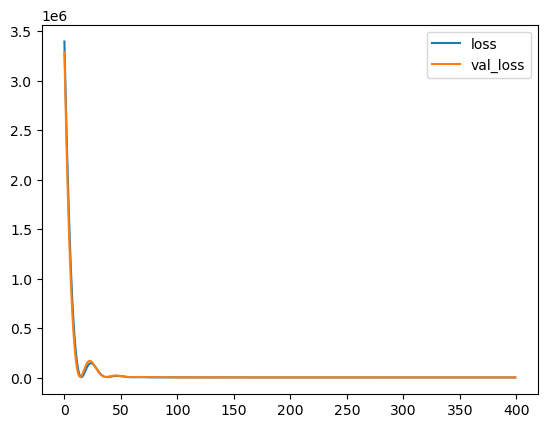

In [33]:
losses={'loss':normModel.model.history.history['loss'],'val_loss':normModel.model.history.history['val_loss']}
losses=pd.DataFrame(losses)
losses.plot()

<Axes: >

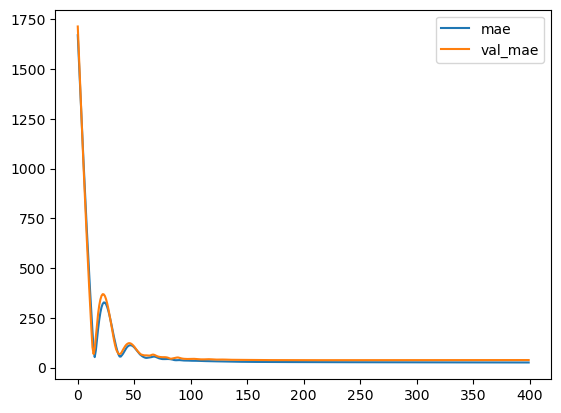

In [34]:
mae={'mae':normModel.model.history.history['mae'],'val_mae':normModel.model.history.history['val_mae']}
mae=pd.DataFrame(mae)
mae.plot()

In [35]:
y_pred=model.predict(x_test_norm)

1/1 [==============================] - 0s 109ms/step


In [36]:
# evaluation metrics for new model

print('Evaluation metrics of model with normalize data')

print('MAE: %.03f' %mean_absolute_error(y_test,y_pred))


print('MSE: %.03f' %mean_squared_error(y_test,y_pred))


print('RMAE: %.03f' %np.sqrt(mean_absolute_error(y_test,y_pred)))


print('R2 score: %.03f' %explained_variance_score(y_test,y_pred))

Evaluation metrics of model with normalize data
MAE: 43.136
MSE: 2912.513
RMAE: 6.568
R2 score: 0.002
